## Название, тема проекта, задачи

Сборный проект №1 - интернет-магазин «Стримчик»

Анализ исторических данных о продаже игр, оценки пользователей, оценки критиков, жанры игр и платформы.

Нужно отработать принцип работы с данными, предобработка данных, статистический и исследовательский анализ данных, провести проверку гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Загружаем файл, изучаем данные

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропусков много, будем разбираться с ними и постараемся найти причину их появления

# Работаем с данными

In [8]:
#Приводим названия всех столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Названия столбцов заменены на такие же, но с нижним регистром
Нашёл пример в старом проекте data['education'] = data['education'].str.lower() и решил попробовать автоматизировать процесс
Но сперва я ручками прописал через .rename, это было недолго т.к. значений немного

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

С пропусками в этом слолбце мы ничего не сможем сделать, даже не убрать, это исказит последующие результаты

Я сперва написал код до 5 пункта сборного проекта, а потом уже начал видеть, как замена nan'ов на 0 искажает результаты

In [9]:
print(data['user_score'].unique())
#data['user_score'] = data['user_score'].fillna('-1')
#TBD - to be determined = будет определено позже

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Аналогично с critic_score, заменить ничего не получится, под 0 nan'ы не заменить, т.к. у нас присутствует такая оценка от пользователей, на -1 тоже исказит результаты, либо придётся добавлять исключение через .query(critic_score > 0)

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

In [11]:
print(data['user_score'].unique())

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


In [12]:
print(data['rating'].unique())
data['rating'] = data['rating'].fillna('no rating')

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


При дальнейшем изучении выяснилось, что очень много пропусков было в рейтингах японских игр, в Японии определяет рейтинг компания CERO (Computer Entertainment Rating Organization), в этой компании свой рейтинг, в том числе и методология присваивания рейтинга играм, но достоверной информации в нашем массиве об этом нет, просто заменим на 'no rating'

In [13]:
print(data['rating'].unique())

['E' 'no rating' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [14]:
print(data['year_of_release'].unique())
data['year_of_release'] = data['year_of_release'].fillna('2033') #Отсылка к серии игр Metro 2033
data['year_of_release'] = data['year_of_release'].astype('int')

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [15]:
print(data['year_of_release'].unique())

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 2033 1995 1991 1981 1987 1980 1983]


Небольшая пасхалка, далее она нам не помешает в исследовании, просто выберем нужные нам года для изучения

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Подготавливаем данные

### убрал оба пропуска_upd

In [17]:
data['name'] = data['name'].fillna('no name game')
no_name_game_del = data[data['name'] == 'no name game']
no_name_game_del

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,no name game,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,no rating
14244,no name game,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,no rating


In [18]:
#а оказывается эти 2 записи и были без без имени и жанра, их продажи маленькие
del_no_name_game = no_name_game_del.index
data.drop(del_no_name_game, inplace=True)

In [19]:
data['genre'] = data['genre'].fillna('no genre game')
no_genre_game_del = data[data['genre'] == 'no genre game']
no_genre_game_del

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
del_no_genre_game = no_genre_game_del.index
data.drop(del_no_genre_game, inplace=True)

In [21]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

Пропуски заменены там где это возможно, кроме столбца user_score, мне кажется неправильно подгонять всё под nan'ы, а пропущенные значения под 0, т.к. есть пользовательская оценка 0, предотвратил смешивание оценок с 0 оценкой от пользователей

Пропуски в столбцах name и genre заменил на no name/genre, возможно потом их убрать придётся, если потребуется

Опять же, причина пропусков неизвестна, они "рандомные", я бы понял если оценка юзеров еще не была сформирована и обработана на накрутку/открутку оценки игры, но остальные пропуски для меня непонятны, скорее ошибки при выгрузке.

In [3]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

KeyError: 'na_sales'

Суммарные продажи подсчитаны, столбец добавлен

In [23]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


## Исследовательский анализ данных
Сколько игр выпускалось каждый год

### Добавил подписи осей

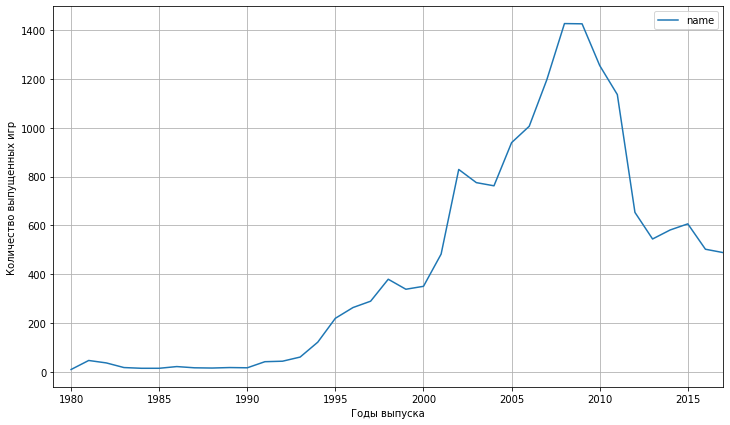

In [24]:
game_per_year = data.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count').plot(grid='true', figsize=(12, 7), xlim=(1979, 2017))
plt.xlabel('Годы выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

В нашем массиве первые игры начали появляться в 80-ых, дальше с развитием технологий игр стало появляться намного больше, думаю даже корреляция будет тесная если найти нужные данные, бум в нашей выборке 2010 год, могу предположить что инвестировали вообще в разные игры не имея какой либо статистики, многие проекты закрылись не релизнувшись.

Есть еще предположение, что разработчики/инвесторы осознали, что, допустим, игры похожие на World of Warcraft (или по-другому называемые "Убийцы WoW") не имеют смысла, клоны не выстрелят и попробуют сосредоточится на других жанрах (почти правда, но те кто решился сделать похожие mmorpg проекты свой кусок торта откусили, но по различным причинам не смогли выйти на такой же уровень)

Так же считаю что за все года данные важны, как минимум для изучения и построения различных гипотез

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. __За какой характерный срок появляются новые и исчезают старые платформы?__

In [25]:
game_per_platform = data.pivot_table(
    index='platform',
    values='name',
    aggfunc='count')
game_per_platform.sort_values(by='name', ascending=False).head(10)

,name
platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824


In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


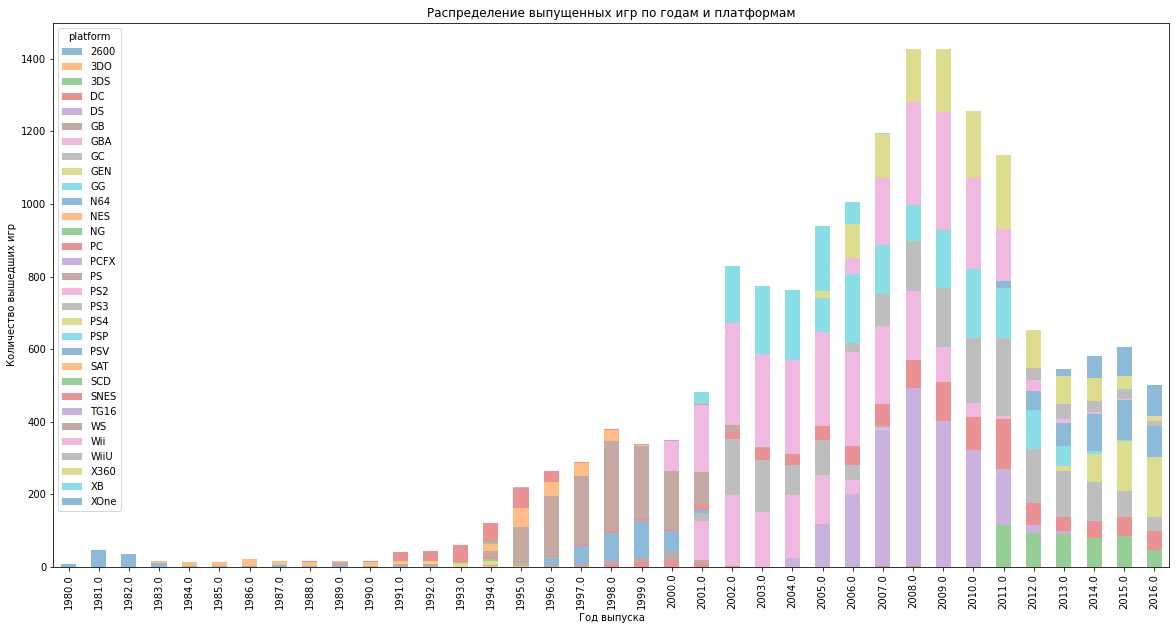

In [9]:
data_platform = data.query('year_of_release <= 2016').pivot_table(
    index='year_of_release',
    columns='platform',
    values='name',
    aggfunc='count').plot(kind='bar', figsize=(20, 10), stacked=True, alpha=0.5)
data_platform.set_title('Распределение выпущенных игр по годам и платформам')
data_platform.set_xlabel('Год выпуска')
data_platform.set_ylabel('Количество вышедших игр')
plt.show()

Чем дальше в будущее, тем больше платформ и появление приемственности в платформах, так же сохранение игр на платформах одной компании позволяет удерживать пользователей, аппетиты игроков растут, требования тоже, новые технологии позволяют эти аппетиты удовлетворять

In [27]:
data_platform_profit = data.groupby('platform').sum()[['total_sales']].reset_index().sort_values(
    by='total_sales', ascending=False)
data_platform_profit.head(10)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


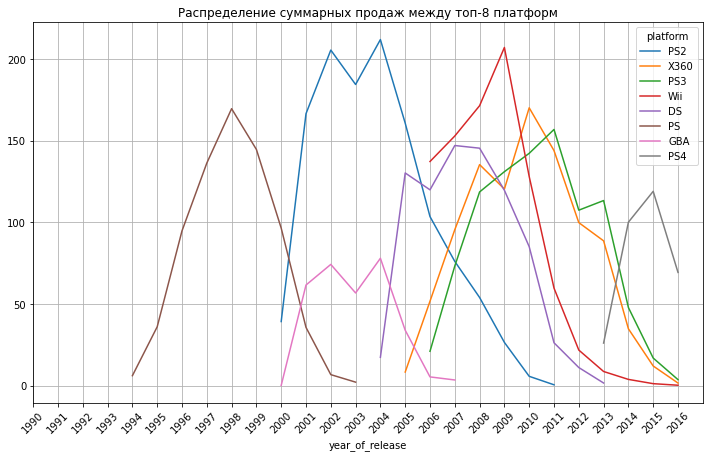

In [28]:
data_top_sales = data.query('year_of_release <= 2016').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum')
data_top_sales = data_top_sales[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4']]
data_top_sales.plot(grid=True, figsize=(12,7), xlim=(1990, 2017), xticks=data_top_sales.index
                   ).set_title('Распределение суммарных продаж между топ-8 платформ')
plt.xticks(rotation = 45)
plt.show()

А тут мы видим подтверждение, на спад спроса PS2 идёт рост спроса на PS3, а дальше спад спроса на PS3 компенсируется повышением ростом продаж PS4, но с выходом каждой новой платформы пик продаж предыдущей не достигается.

Скорее всего такая приемственность имеется и в других платформах, но они не вошли в наш топ продаж

Примерная продолжительность жизни платформ составляет почти 9 лет.

Появление новых платформ с развитием технологий всё время уменьшается, т.к. платформ становится всё больше и больше, а еще покупатель может купить сразу несколько платформ, например иметь PC и PS4

In [29]:
new_data_top_sales = data.query('year_of_release >= 2014 and year_of_release <= 2015').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum')
new_data_top_sales.head()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.0,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.9,0.12,6.25,1.14,16.35,11.96,60.14


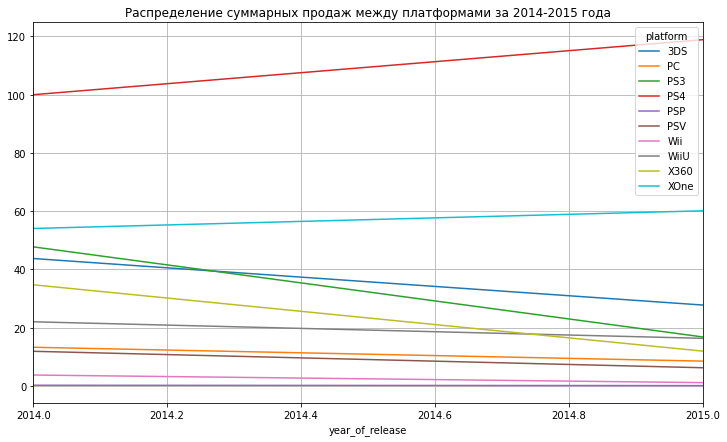

In [30]:
new_data_top_sales.plot(grid=True, figsize=(12,7), xlim=(2014, 2015)
                   ).set_title('Распределение суммарных продаж между платформами за 2014-2015 года')
plt.show()

С 2014 по 2015 год заметно как растёт популярность PS4 и Xbox One, остальные продажи медленно, но идут на спад, возможно не выдержали конкуренции, точно за основу возьмём эти две платформы, а так же добавим в потенциально прибыльные платформы PC - релизы игр для массовости принято делать на PC, а потом на остальных платформах (кстати, эта тенденция стала обратной в наше время, в частности из-за эксклюзивов, исключение Xbox - по сути это одна платформа как и PC), WiiU и 3DS.

Потенциально прибыльные платформы это PC, PS4, XOne, WiiU, 3DS

In [31]:
def categorize_purpose(row):
    if '3DS' in row:
            return '3DS'
    elif 'PC' in row:
            return 'PC'
    elif 'PS4' in row:
            return 'PS4'
    elif 'WiiU' in row:
            return 'WiiU'
    elif 'XOne' in row:
            return 'XOne'
    else:
        return 'other'
    
data['platform_category'] = data['platform'].apply(categorize_purpose)
data['platform_category'].unique()

array(['other', 'PS4', '3DS', 'PC', 'XOne', 'WiiU'], dtype=object)

In [32]:
data_ppp = data.query(
    'year_of_release >= 2014 & year_of_release <= 2015 & platform in ["PC", "PS4", "XOne", "WiiU", "3DS"]')

In [33]:
data_pie = data.query(
    'year_of_release >= 2014 & year_of_release <= 2015 & platform_category in ["PC", "PS4", "XOne", "WiiU", "3DS", "other"]')

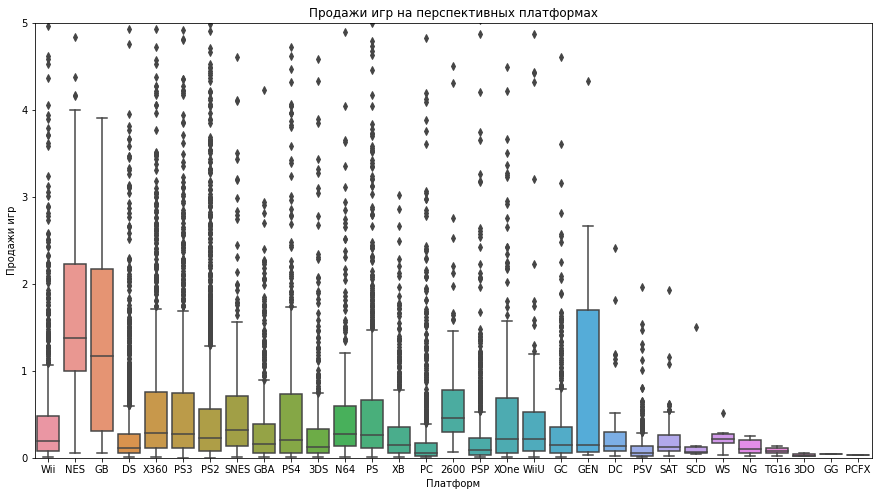

In [34]:
#.query('year_of_release >= 2014 & year_of_release <= 2015')
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='platform', y='total_sales', data=data)
ax.set_ylim(0, 5)
ax.set_ylabel('Продажи игр')
ax.set_xlabel('Платформ')
ax.set_title('Продажи игр на перспективных платформах')
plt.show()

По "Ящикам с усами" мы видим что есть смещение медианных значений к нижнему краю, значит на всех платформах имеется много игр с низкими продажами, но везде есть небольшое количество игр с высокими продажами

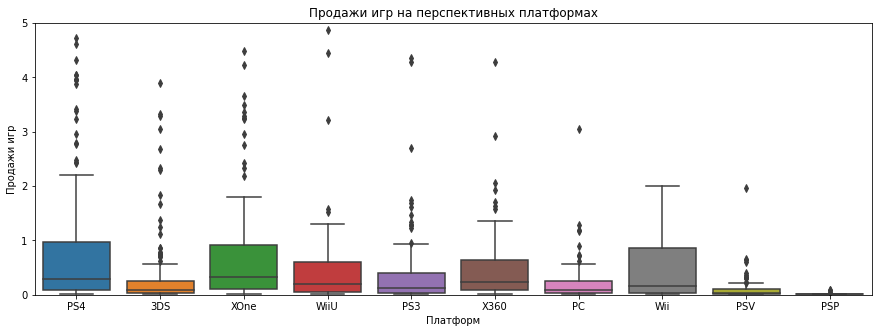

In [35]:
# check
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x='platform', y='total_sales', data=data.query('year_of_release >= 2014 & year_of_release <= 2015'))
ax.set_ylim(0, 5)
ax.set_ylabel('Продажи игр')
ax.set_xlabel('Платформ')
ax.set_title('Продажи игр на перспективных платформах')
plt.show()

In [36]:
data_ppp.groupby('platform')[['user_score', 'critic_score']].agg('mean').round(2)
#когда я заменил критик_скор на -1, у меня очень сильно скосился метод выше, пришлось просто оставить nan как есть

,user_score,critic_score
platform,,
3DS,7.07,68.27
PC,6.30,76.61
PS4,6.80,72.51
WiiU,7.05,70.79
XOne,6.59,73.77


In [37]:
data_ppp.query('platform == "PS4"')['total_sales'].corr(data_ppp.query('platform == "PS4"')['user_score'])

0.005328260777115949

In [38]:
data_ppp.query('platform == "PS4"')['total_sales'].corr(data_ppp.query('platform == "PS4"')['critic_score'])

0.42900347027386077

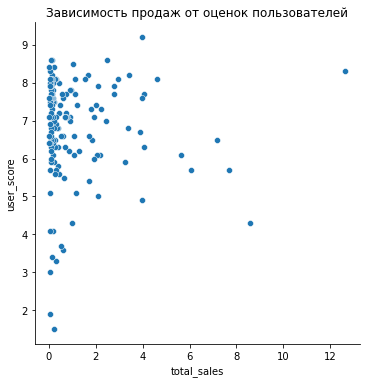

In [39]:
sns.relplot(data=data_ppp.query('platform == "PS4"'), x='total_sales', y='user_score')
plt.title('Зависимость продаж от оценок пользователей')
plt.show()

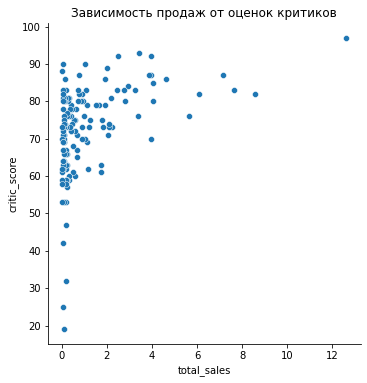

In [40]:
sns.relplot(data=data_ppp.query('platform == "PS4"'), x='total_sales', y='critic_score')
plt.title('Зависимость продаж от оценок критиков')
plt.show()

In [41]:
data_ppp.query('platform == "XOne"')['total_sales'].corr(data_ppp.query('platform == "XOne"')['user_score'])

-0.056545980194161016

In [42]:
data_ppp.query('platform == "XOne"')['total_sales'].corr(data_ppp.query('platform == "XOne"')['critic_score'])

0.47413765367287475

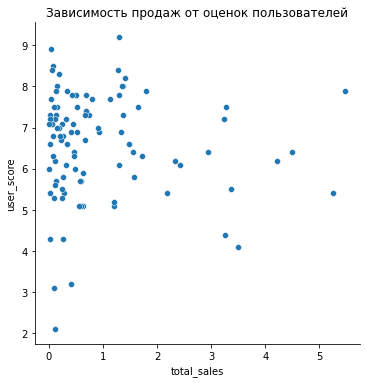

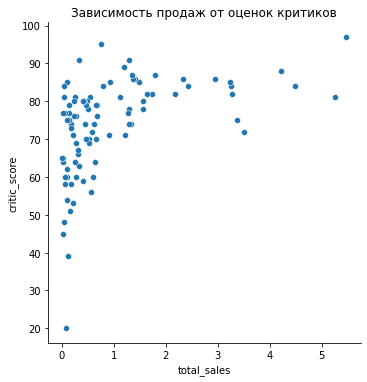

In [43]:
sns.relplot(data=data_ppp.query('platform == "XOne"'), x='total_sales', y='user_score')
plt.title('Зависимость продаж от оценок пользователей')
sns.relplot(data=data_ppp.query('platform == "XOne"'), x='total_sales', y='critic_score')
plt.title('Зависимость продаж от оценок критиков')
plt.show()

In [44]:
data_ppp.query('platform == "PC"')['total_sales'].corr(data_ppp.query('platform == "PC"')['user_score'])

-0.11991644726508223

In [45]:
data_ppp.query('platform == "PC"')['total_sales'].corr(data_ppp.query('platform == "PC"')['critic_score'])

0.1826622763616279

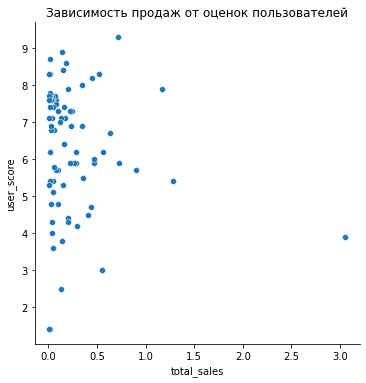

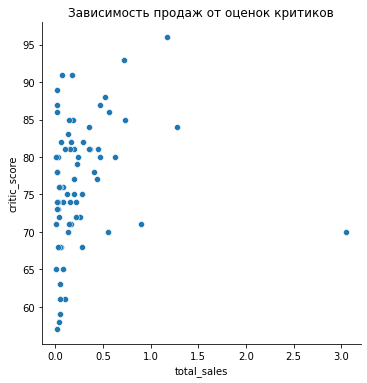

In [46]:
sns.relplot(data=data_ppp.query('platform == "PC"'), x='total_sales', y='user_score')
plt.title('Зависимость продаж от оценок пользователей')
sns.relplot(data=data_ppp.query('platform == "PC"'), x='total_sales', y='critic_score')
plt.title('Зависимость продаж от оценок критиков')
plt.show()

In [47]:
data_ppp.query('platform == "3DS"')['total_sales'].corr(data_ppp.query('platform == "3DS"')['user_score'])

0.23461041305360805

In [48]:
data_ppp.query('platform == "3DS"')['total_sales'].corr(data_ppp.query('platform == "3DS"')['critic_score'])

0.3417063008600105

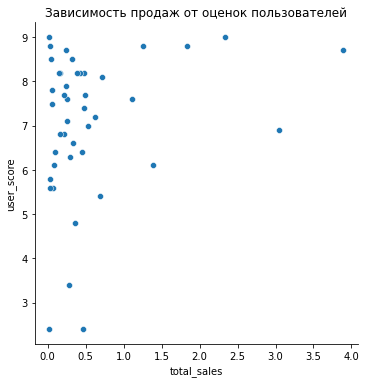

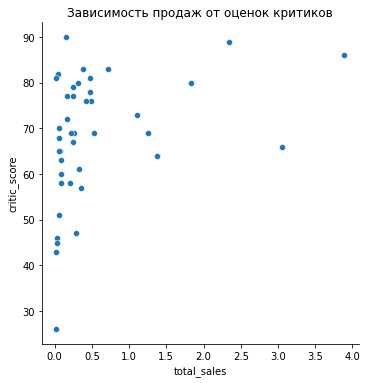

In [49]:
sns.relplot(data=data_ppp.query('platform == "3DS"'), x='total_sales', y='user_score')
plt.title('Зависимость продаж от оценок пользователей')
sns.relplot(data=data_ppp.query('platform == "3DS"'), x='total_sales', y='critic_score')
plt.title('Зависимость продаж от оценок критиков')
plt.show()

In [50]:
data_ppp.query('platform == "WiiU"')['total_sales'].corr(data_ppp.query('platform == "WiiU"')['user_score'])

0.4316948771718134

In [51]:
data_ppp.query('platform == "WiiU"')['total_sales'].corr(data_ppp.query('platform == "WiiU"')['critic_score'])

0.38918854423925586

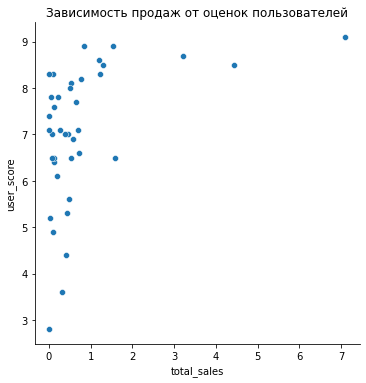

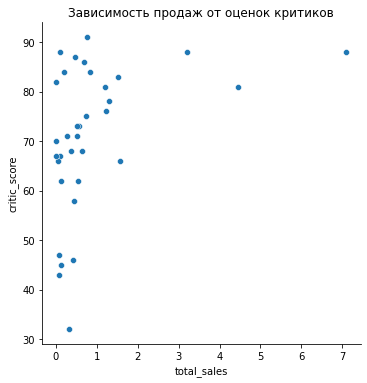

In [52]:
sns.relplot(data=data_ppp.query('platform == "WiiU"'), x='total_sales', y='user_score')
plt.title('Зависимость продаж от оценок пользователей')
sns.relplot(data=data_ppp.query('platform == "WiiU"'), x='total_sales', y='critic_score')
plt.title('Зависимость продаж от оценок критиков')
plt.show()

Корреляция продаж с оценками критиков существует, но не так сильно, не думаю что это как-то напрямую влияет на продажи

Оценки пользователей еще меньше влияют на продажи, чем оценки от критиков

Исключением стала платформа WiiU, оценка пользователей влияет на продажи чуть больше, чем оценки критиков

In [53]:
data_ppp['genre'].value_counts()

Action          257
Role-Playing     94
Sports           62
Shooter          53
Misc             51
Adventure        46
Racing           26
Strategy         20
Simulation       20
Fighting         19
Platform         16
Puzzle           11
Name: genre, dtype: int64

In [54]:
data_ppp.pivot_table(
    index='genre',
    columns='platform',
    values='total_sales',
    aggfunc='sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

platform,3DS,PC,PS4,WiiU,XOne
genre,,,,,
Action,23.6%,22.0%,35.1%,21.3%,23.3%
Adventure,1.5%,0.8%,1.9%,0.4%,2.2%
Fighting,11.3%,0.2%,2.3%,12.7%,1.6%
Misc,4.7%,0.2%,3.3%,10.0%,5.8%
Platform,5.1%,nan%,1.5%,17.3%,0.3%
Puzzle,1.2%,nan%,0.0%,3.2%,nan%
Racing,nan%,2.4%,4.1%,18.5%,4.7%
Role-Playing,44.3%,20.4%,10.5%,2.9%,8.1%
Shooter,nan%,17.8%,24.8%,11.6%,38.3%


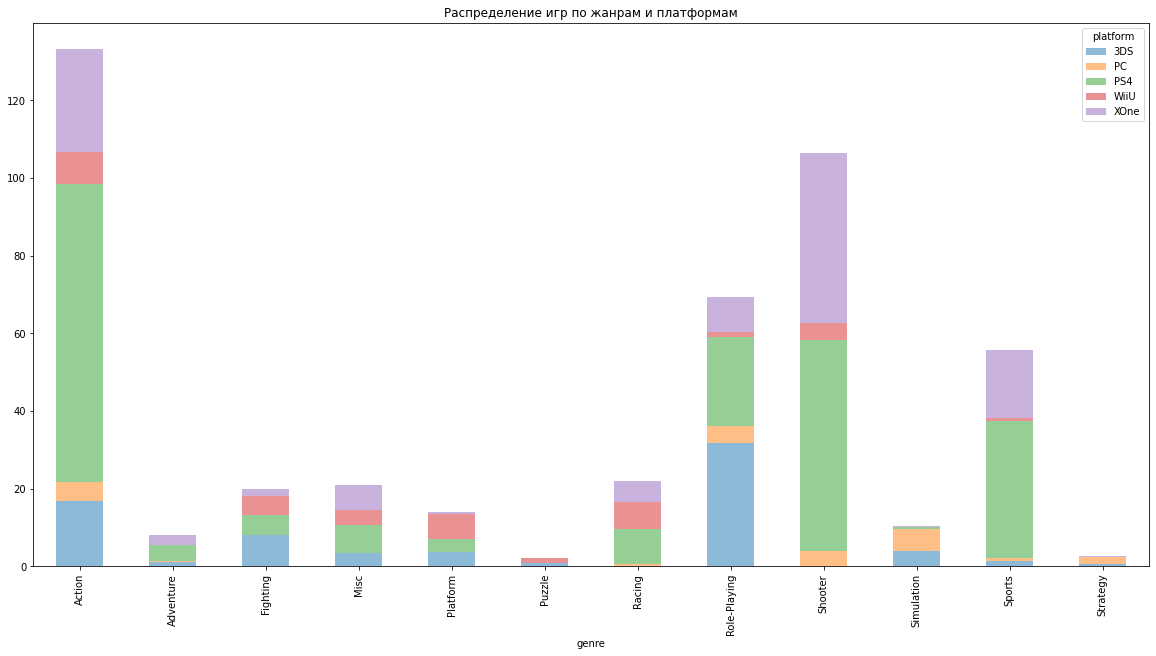

In [55]:
data_ppp.pivot_table(
    index='genre',
    columns='platform',
    values='total_sales',
    aggfunc='sum').plot(kind='bar', figsize=(20, 10), stacked=True, alpha=0.5
                       ).set_title('Распределение игр по жанрам и платформам')
plt.show()

С огромным разрывом лидирует жанр Action, далее идут игры с жанрами shooter и sports, все 3 жанра очень динамичные, для меня неудивительна такая статистика по жанрам

Не могу не отметить жанр role-playing на платформе 3DS

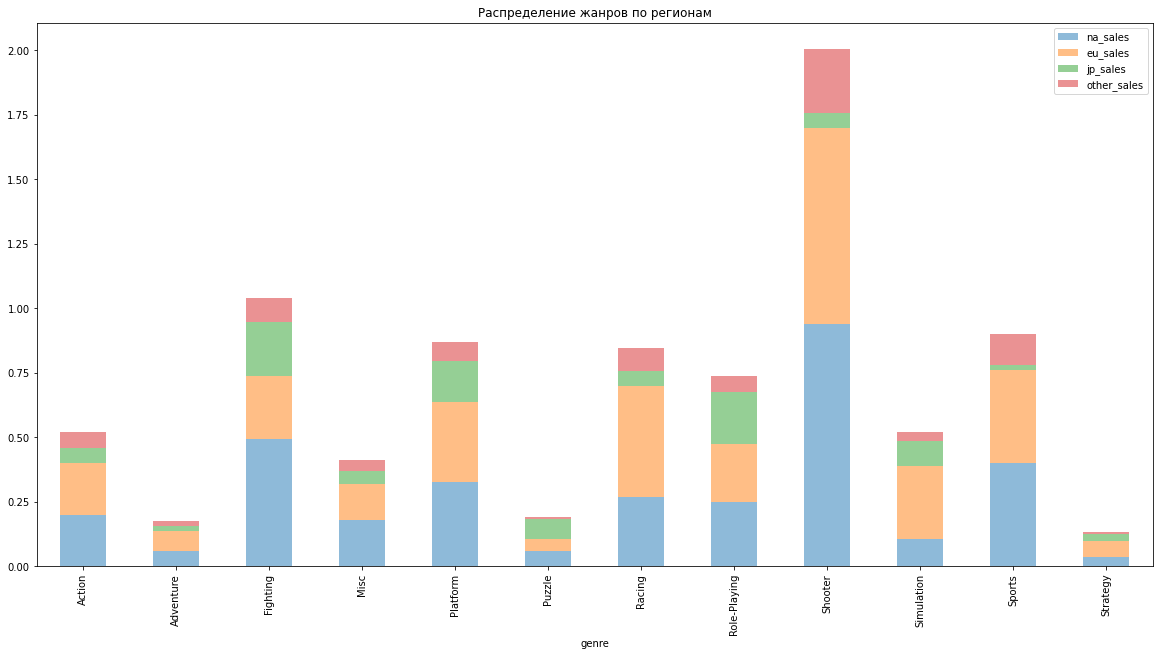

In [56]:
data_ppp.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg('mean').plot(
    kind='bar', figsize=(20, 10), stacked=True, alpha=0.5).set_title('Распределение жанров по регионам')
plt.show()

А вот по регионам уже картина другая, первую строчку с большим отрывом занимает жанр shooter, далее за ним идут жанры sport, platform, action уже не так высоко

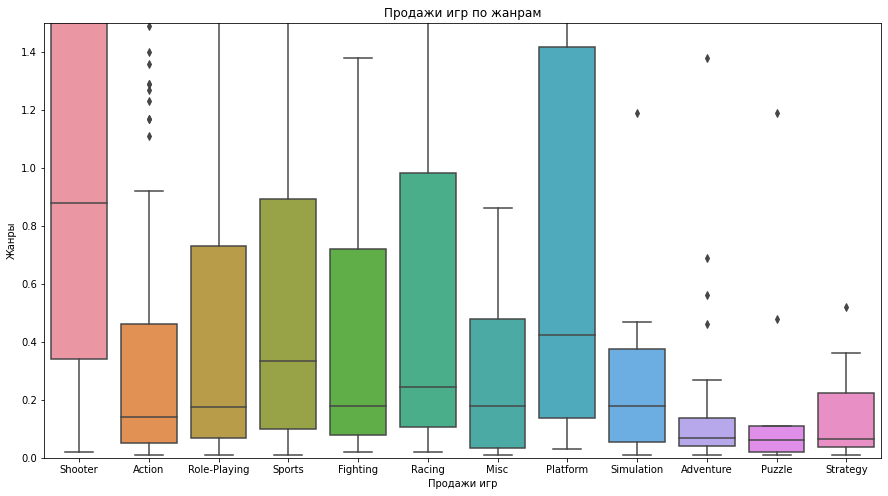

In [57]:
#с выбросами
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='genre', y='total_sales', data=data_ppp)
ax.set_ylim(0, 1.5)
ax.set_ylabel('Жанры')
ax.set_xlabel('Продажи игр')
ax.set_title('Продажи игр по жанрам')
plt.show()

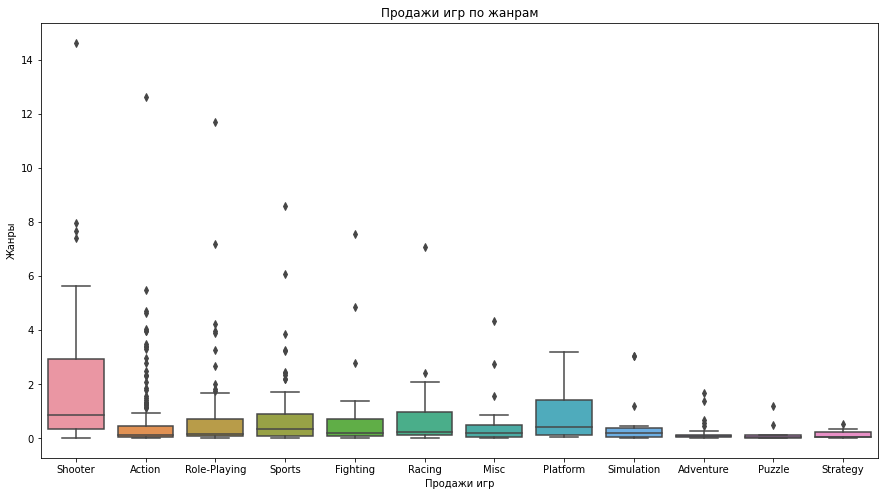

In [58]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='genre', y='total_sales', data=data_ppp)
ax.set_ylabel('Жанры')
ax.set_xlabel('Продажи игр')
ax.set_title('Продажи игр по жанрам')
plt.show()

Все так же видим, есть выбросы, то есть во всех жанрах, кроме platform имеется успешные проекты, которые выбиваются из ящика с усами, а медиана все так же стремится к нижней части ящика.

In [59]:
data_ppp.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC'], dtype=object)

## Составьте портрет пользователя каждого региона

### Самые популярные жанры по регионам (топ-5)

In [60]:
data_pie.pivot_table(
    index='genre',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
genre,,,
Action,29.2%,30.5%,26.4%
Adventure,2.4%,3.3%,2.0%
Fighting,2.4%,7.6%,4.4%
Misc,5.6%,6.2%,6.0%
Platform,2.5%,3.5%,2.3%
Puzzle,0.2%,1.3%,0.3%
Racing,5.6%,2.4%,3.3%
Role-Playing,10.9%,33.3%,11.5%
Shooter,22.6%,5.2%,26.3%


В EU и NA преобладают жанры action и shooter, в JP action и role-playing

По моему игровому опыту, это неудивительно, т.к. чаще всего эти жанры друг с другом пересекаются в одной и той же игре, да и активные игры... интереснее ? да, интереснее, чем например игры с жанром puzzle, но на каждый жанр найдётся свой игрок

а что с жанром strategy ? очень интересно, даже не верится

### Самые популярные платформы (топ-5)

In [61]:
test_two = data_pie.pivot_table(
    index='platform_category',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').apply(lambda col: col / col.sum(), axis=0)

#### самые популярные платформы европы

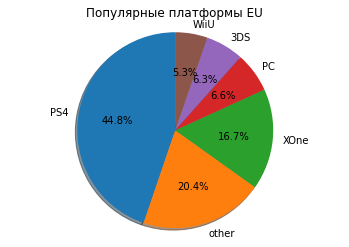

In [62]:
test_two.reset_index(inplace=True)
test_two.sort_values(by=['eu_sales'], ascending=False, inplace=True)
labels = test_two['platform_category']
sizes = test_two['eu_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Популярные платформы EU')

plt.show()

#### самые популярные платформы америки

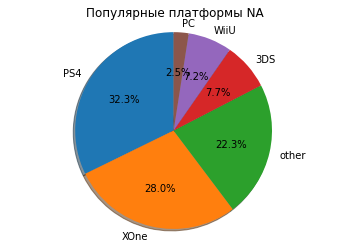

In [63]:
test_two.reset_index(inplace=True)
test_two.sort_values(by=['na_sales'], ascending=False, inplace=True)
labels = test_two['platform_category']
sizes = test_two['na_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Популярные платформы NA')

plt.show()

#### самые популярные платформы японии

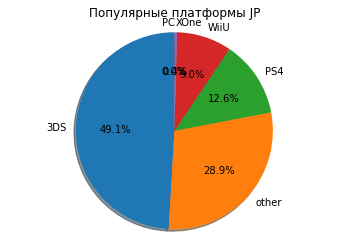

In [64]:
test_two.reset_index(inplace=True)
test_two.sort_values(by=['jp_sales'], ascending=False, inplace=True)
labels = test_two['platform_category']
sizes = test_two['jp_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=False)
ax1.axis('equal')
ax1.set_title('Популярные платформы JP')

plt.show()

#### самые популярные платформы вместе

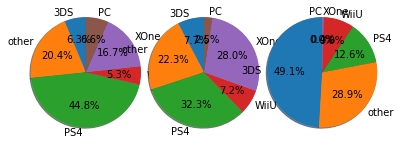

3    0.062836
2    0.203591
0    0.447735
4    0.053176
1    0.166864
5    0.065798
Name: eu_sales, dtype: float64

3      3DS
2    other
0      PS4
4     WiiU
1     XOne
5       PC
Name: platform_category, dtype: object

In [89]:
sizes_eu = test_two['eu_sales']
sizes_na = test_two['na_sales']
sizes_jp = test_two['jp_sales']
labels_eu = test_two['platform_category']
labels_na = test_two['platform_category']
labels_jp = test_two['platform_category']
fig1, ax1 = plt.subplots(ncols=3)

ax1[0].pie(sizes_eu, labels=labels_eu, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=False, radius=1.4)


ax1[1].pie(sizes_na, labels=labels_na, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=False, radius=1.4)


ax1[2].pie(sizes_jp, labels=labels_jp, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=False, radius=1.4)


plt.show()
display(sizes_eu)
display(labels_eu)

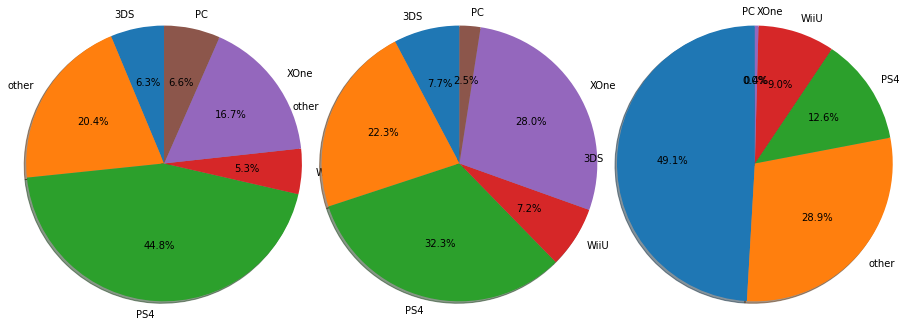

3    0.062836
2    0.203591
0    0.447735
4    0.053176
1    0.166864
5    0.065798
Name: eu_sales, dtype: float64

3      3DS
2    other
0      PS4
4     WiiU
1     XOne
5       PC
Name: platform_category, dtype: object

In [90]:
#  check
sizes_eu = test_two['eu_sales']
sizes_na = test_two['na_sales']
sizes_jp = test_two['jp_sales']
labels_eu = test_two['platform_category']
labels_na = test_two['platform_category']
labels_jp = test_two['platform_category']
fig1, ax1 = plt.subplots(ncols=3, figsize = (15,5))

ax1[0].pie(sizes_eu, labels=labels_eu, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=False, radius=1.4)


ax1[1].pie(sizes_na, labels=labels_na, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=False, radius=1.4)


ax1[2].pie(sizes_jp, labels=labels_jp, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=False, radius=1.4)


plt.show()
display(sizes_eu)
display(labels_eu)

In [67]:
data_pie.pivot_table(
    index='platform_category',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
platform_category,,,
3DS,6.3%,49.1%,7.7%
PC,6.6%,0.0%,2.5%
PS4,44.8%,12.6%,32.3%
WiiU,5.3%,9.0%,7.2%
XOne,16.7%,0.4%,28.0%
other,20.4%,28.9%,22.3%


в EU доминирует PS4, далее идут остальные платформы, после них XOne, 

в NA так же доминирует PS4, им в спину дышит XOne, дальше идут остальные платформы

в JP преобладает 3DS, после них идут в сумме остальные платформы, третья платформа PS4

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [68]:
data_pie.pivot_table(
    index='rating',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum').apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales
rating,,,
E,20.3%,10.7%,17.9%
E10+,10.2%,5.4%,12.3%
M,35.0%,9.2%,33.8%
T,11.1%,17.0%,12.5%
no rating,23.5%,57.7%,23.5%


Много пропусков в JP, т.к. в Японии CERO, отдельная организация которая выставляет рейтинги играм

Думаю, некоторые жанры могут иметь более высокий рейтинг, например шутеры, жестокость в играх становится предметом дискуссий и игры первые принимают на себя удар обвинений в различных ситуациях с участием детей

In [69]:
data_pie.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

## Проверим гипотезы

### первая гипотеза

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги платформ Xbox One и PC не одинаковы.

Уровень значимости равен 0.05

In [70]:
#убираем пропуски в Xbox One и PC
xbox_one = data.query('platform == "XOne" and year_of_release >= 2014 and year_of_release <= 2015').user_score.dropna()
pc = data.query('platform == "PC" and year_of_release >= 2014 and year_of_release <= 2015').user_score.dropna()

In [71]:
xbox_one.describe()

count    99.000000
mean      6.591919
std       1.263351
min       2.100000
25%       5.800000
50%       6.800000
75%       7.500000
max       9.200000
Name: user_score, dtype: float64

In [72]:
pc.describe()

count    77.000000
mean      6.298701
std       1.692980
min       1.400000
25%       5.400000
50%       6.800000
75%       7.600000
max       9.300000
Name: user_score, dtype: float64

In [73]:
#проверяем гипотезу

alpha = .05

results = st.ttest_ind(xbox_one, pc, equal_var = False) #True для равных выборок, у нас же выборки не равные
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.2064150169331124
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские оценки не одинаковые, но с вероятностью в 20% такое или большее различие в оценках можно получить случайно.

### вторая гипотеза

Средние пользовательские рейтинги жанров Action и Sports одинаковые

Средние пользовательские рейтинги жанров Action и Sports различаются

Уровень значимости: 0.05

In [74]:
#так же уберем пропуски в интересующих нас жанрах
action_check = data.query('genre == "Action"').user_score.dropna()
sports_check = data.query('genre == "Sports"').user_score.dropna()

In [75]:
action_check.describe()

count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [76]:
sports_check.describe()

count    1103.000000
mean        6.961197
std         1.611370
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [77]:
#проверяем гипотезу

alpha = .05

results = st.ttest_ind(action_check, sports_check, equal_var = False) #True для равных выборок, у нас же выборки не равные
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средние пользовательские оценки жанров Action и Sports не одинаковые, но с вероятностью в 11% такое или большее различие в оценках можно получить случайно.

In [78]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

На основе данных о продаже игр за 2014-2015 года можно сделать следующие выводы:

Потенциально прибыльные платформы нового поколения Xbox One от Microsoft, PlayStation 4 от Sony, некоторое время будут актуальны игры для Nintendo 3DS.

По рынкам:

В NA регионе можно сделать ставку на платформы PS4, но так же не стоит забывать и о Xbox One который несильно отстаёт.

В EU регионе доминирует PlayStation, а значит делаем ставку на эту платформу, 

В JP регионе в основном можно сделать ставку на 3DS, но и не забыть про PlayStation, т.к. она является второй платформой в регионе.

По жанрам игр выделяются жанры action, shooter, sport, но в японском регионе так же любимым жанром является role-playing, его стоит учитывать при разработке стратегии продаж в регионе.

Оценки пользователей на продажи влияют меньше чем оценки критиков, но не сильно, но к критикам можно придумать свой подход для продвижения платформ и/или игр разных жанров.

Проверка двух гипотез показала что:

Гипотеза о средних пользовательских рейтингах Xbox One и PC не одинаковы.

Гипотеза о средних пользовательских рейтинга в жанрах Action и Sports различаются.